<a href="https://colab.research.google.com/github/Sugirjan/NumericImageClassifier/blob/master/notebooks/3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# baseline cnn model for mnist
import numpy as np
from numpy import mean
from numpy import std
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.constraints import max_norm
from keras.layers import Conv2D, Conv2DTranspose
import matplotlib.pyplot as plt

In [ ]:
# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = mnist.load_data()
	# reshape dataset which has images with 28 by 28 pixels to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

In [ ]:
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

In [ ]:
# define cnn model
def define_model():
  # Creating a Sequential Model and adding the layers
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
	model.add(MaxPooling2D((2, 2)))
  # Flattening the 2D arrays for fully connected layers
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	model.compile(optimizer=SGD(lr=0.01, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [ ]:
# run the test harness for evaluating a model
def run_test_harness():
  # load dataset
  trainX, trainY, testX, testY = load_dataset()
  # prepare pixel data
  trainX, testX = prep_pixels(trainX, testX)
  # define model
  model = define_model()
  # fit model
  model.fit(trainX, trainY, epochs=10, batch_size=32, verbose=0)
  _, acc = model.evaluate(testX, testY, verbose=0)
  print('> %.3f' % (acc * 100.0))


In [ ]:
# entry point, run the test harness
run_test_harness()

> 99.020


In [ ]:
def build_encoder() : 
  auto_encoder = Sequential()
  auto_encoder.add(Conv2D(64, kernel_size=(3, 3), kernel_constraint=max_norm(max_norm_value), activation='relu', kernel_initializer='he_uniform', input_shape=(28,28,1)))
  auto_encoder.add(Conv2D(32, kernel_size=(3, 3), kernel_constraint=max_norm(max_norm_value), activation='relu', kernel_initializer='he_uniform'))
  auto_encoder.add(Conv2DTranspose(32, kernel_size=(3,3), kernel_constraint=max_norm(max_norm_value), activation='relu', kernel_initializer='he_uniform'))
  auto_encoder.add(Conv2DTranspose(64, kernel_size=(3,3), kernel_constraint=max_norm(max_norm_value), activation='relu', kernel_initializer='he_uniform'))
  auto_encoder.add(Conv2D(1, kernel_size=(3, 3), kernel_constraint=max_norm(max_norm_value), activation='sigmoid', padding='same'))
  auto_encoder.compile(optimizer='adadelta', loss='binary_crossentropy')
  return auto_encoder;

In [ ]:
#  load data
trainX, trainY, testX, testY = load_dataset()
trainX, testX = prep_pixels(trainX, testX)

  # Add noise for data
noise_factor = 0.5
trainX_noisy = trainX + noise_factor * np.random.normal(loc = 0.0, scale=1.0, size=trainX.shape)
testX_noisy = testX + noise_factor * np.random.normal(loc = 0.0, scale=1.0, size=testX.shape)
trainX_noisy = np.clip(trainX_noisy, 0. , 1.)
testX_noisy = np.clip(testX_noisy, 0. , 1.)

max_norm_value = 2.0

auto_encoder = build_encoder()
auto_encoder.fit(trainX_noisy, trainX,epochs=4,batch_size=150)

trainX_denoised =  auto_encoder.predict(trainX_noisy)
testX_denoised =  auto_encoder.predict(testX_noisy) 

  # define model
model = define_model()
  # fit model
model.fit(trainX_denoised, trainY, epochs=4, batch_size=32, validation_data=(testX_denoised, testY))
_, acc = model.evaluate(testX_denoised, testY)
print('> %.3f' % (acc * 100.0))

Epoch 1/4
60000/60000 [==============================] - 487s 8ms/step - loss: 0.1419
Epoch 2/4
60000/60000 [==============================] - 489s 8ms/step - loss: 0.1065
Epoch 3/4
60000/60000 [==============================] - 487s 8ms/step - loss: 0.1029
Epoch 4/4
60000/60000 [==============================] - 488s 8ms/step - loss: 0.1007
Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 83s 1ms/step - loss: 0.1976 - accuracy: 0.9367 - val_loss: 0.1119 - val_accuracy: 0.9649
Epoch 2/4
60000/60000 [==============================] - 83s 1ms/step - loss: 0.1017 - accuracy: 0.9671 - val_loss: 0.0926 - val_accuracy: 0.9716
Epoch 3/4
60000/60000 [==============================] - 83s 1ms/step - loss: 0.0811 - accuracy: 0.9738 - val_loss: 0.0946 - val_accuracy: 0.9695
Epoch 4/4
10000/10000 [==============================] - 4s 405us/step
> 97.220


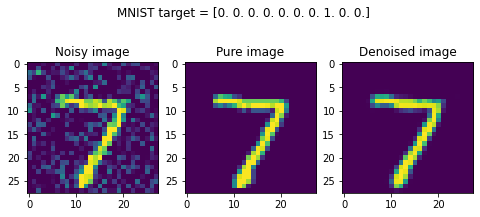

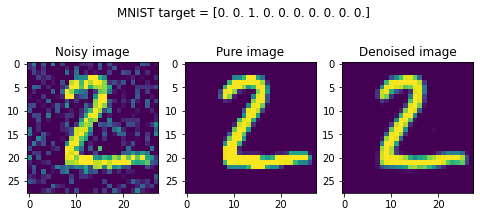

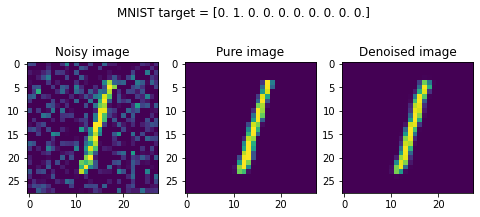

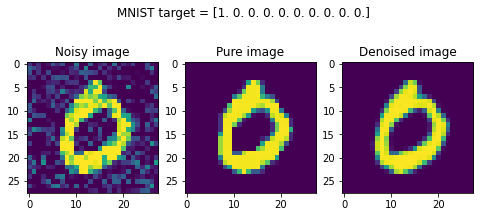

> 99.050


In [ ]:

# print the denoised images
for i in range(0, number_of_visualizations):
  noisy_image = testX_noisy[i][:, :, 0]
  pure_image  = testX[i][:, :, 0]
  denoised_image = denoised_images[i][:, :, 0]
  input_class = testY[i]
  fig, axes = plt.subplots(1, 3)
  fig.set_size_inches(8, 3.5)
  axes[0].imshow(noisy_image)
  axes[0].set_title('Noisy image')
  axes[1].imshow(pure_image)
  axes[1].set_title('Pure image')
  axes[2].imshow(denoised_image)
  axes[2].set_title('Denoised image')
  fig.suptitle(f'MNIST target = {input_class}')
  plt.show()

trainX_denoised =  auto_encoder.predict(trainX_noisy)
testX_denoised =  auto_encoder.predict(testX_noisy) 

  # define model
model = define_model()
  # fit model
model.fit(trainX_denoised, trainY, epochs=10, batch_size=32, verbose=1, validation_data=(testX_denoised, testY))
_, acc = model.evaluate(testX_denoised, testY, verbose=0)
print('> %.3f' % (acc * 100.0))

In [ ]:
def predict_using_model(model, X_test, y_test):
    predicted_classes = model.predict_classes(X_test)
    
    # get the correct and incorrect predictions seperated so that it can be printed later
    correct_indices = np.nonzero(predicted_classes == y_test)[0]
    incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
    
    return predicted_classes, correct_indices, incorrect_indices
validation_data=(X_test, Y_test)

array([[1.15454472e-10, 4.18281021e-10, 4.77752282e-09, ...,
        1.00000000e+00, 2.08295645e-10, 3.45926523e-08],
       [1.58961022e-09, 2.48642738e-11, 1.00000000e+00, ...,
        4.83631418e-15, 9.09683023e-11, 2.78022031e-14],
       [1.11268376e-10, 9.99991298e-01, 1.29244180e-08, ...,
        3.49704897e-06, 1.05550431e-08, 3.52492524e-09],
       ...,
       [1.59122201e-19, 1.10790413e-12, 7.17963231e-16, ...,
        1.55049463e-11, 1.43346454e-11, 2.75115217e-12],
       [3.53018259e-09, 7.31379001e-14, 1.57505184e-15, ...,
        2.60600206e-14, 7.61544561e-06, 2.14162116e-13],
       [5.17502534e-12, 8.93653207e-11, 5.86465668e-11, ...,
        1.72375599e-16, 8.16746323e-12, 1.83871350e-15]], dtype=float32)

In [ ]:
testX_denoised =  auto_encoder.predict(testX_noisy) 

NameError: ignored

In [ ]:
import matplotlib.pyplot as plt

def print_images(X_train, y_train):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(X_train[i].reshape(28,28), interpolation='none')
        plt.title("Class {}".format(y_train[i]))
print_images(trainX, trainY)

In [ ]:
print_images(trainX_denoised, trainY)

In [ ]:
run_test_harness_without_noise()